In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
# from scipy.stats import spearmanr

ionosphere = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')

#cleaning up ionosphere data
ionosphere.head() #shows first 5 rows
# looking at ionosphere.head() shows that the first row
#does not have correct names but rather an entry
#source for correct column names: https://datahub.io/machine-learning/ionosphere#readme

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [2]:
#extract top column as data
column = ['a01','a02','a03','a04','a05',
'a06','a07','a08','a09','a10','a11','a12',
'a13','a14','a15','a16','a17','a18','a19',
'a20','a21','a22','a23','a24','a25','a26',
'a27','a28','a29','a30','a31','a32','a33','a34','class']
new_datapoint = pd.Series(ionosphere.columns, index = ionosphere.columns)

In [3]:
#add initial column as datapoint
ionosphere = ionosphere.append(new_datapoint,ignore_index=True)
#replace initial features with properly named features
ionosphere.columns=column

In [4]:
ionosphere.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.1904,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,-0.4022,0.58984,-0.22145,0.431,-0.17365,0.60436,-0.2418,0.56045,-0.38238,g
2,1,0,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,b
3,1,0,1,-0.02401,0.9414,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.1329,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.0324,0.09223,-0.07859,0.00732,0,0,-0.00039,0.12011,b


In [5]:
ionosphere.isna().any() #no NaN entries

a01      False
a02      False
a03      False
a04      False
a05      False
a06      False
a07      False
a08      False
a09      False
a10      False
a11      False
a12      False
a13      False
a14      False
a15      False
a16      False
a17      False
a18      False
a19      False
a20      False
a21      False
a22      False
a23      False
a24      False
a25      False
a26      False
a27      False
a28      False
a29      False
a30      False
a31      False
a32      False
a33      False
a34      False
class    False
dtype: bool

In [6]:
ionosphere['a02'].value_counts() #showed that a02 is just 0 for all entries so its irrelevant
#for training our model and can be removed
ionosphere = ionosphere.drop(columns = ['a02']) #removes a02

In [7]:
print(ionosphere.shape)

(351, 34)


In [8]:
#checks if all entries are floats
#returned false for a11 so i checked the entries in a11
ionosphere.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
#checking a11 entries in a11, its shown one of them is 0.85243.1 which is not a valid float
#need to remove that row
for i in ionosphere['a11']:
    if not is_float(i):
        print(i)

0.85243.1


In [9]:
#removes the only row with the problem then converting all types to float.
ionosphere.drop(ionosphere[ionosphere['a11']=="0.85243.1"].index,inplace=True)
print(ionosphere.shape)  #350 by 34 after removing one row

(350, 34)


In [10]:
ionosphere.head()

,a01,a03,a04,a05,a06,a07,a08,a09,a10,a11,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.1904,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,0.73082,...,-0.4022,0.58984,-0.22145,0.431,-0.17365,0.60436,-0.2418,0.56045,-0.38238,g
2,1,1,-0.45161,1,1,0.71216,-1,0,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,b
3,1,1,-0.02401,0.9414,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.1329,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.0324,0.09223,-0.07859,0.00732,0,0,-0.00039,0.12011,b


In [11]:
ionosphere['a01'].value_counts()
# for i in ionosphere['class']:
#     if(i=='b'):
#         i=0
#     if(i=='g'):
#         i=1
# ionosphere['class' = ionosphere[ionosphere['class']=='b']
# for i in ionosphere['class']:
#     print(i)


1    312
0     38
Name: a01, dtype: int64

In [12]:
ionosphere.dtypes

a01      object
a03      object
a04      object
a05      object
a06      object
a07      object
a08      object
a09      object
a10      object
a11      object
a12      object
a13      object
a14      object
a15      object
a16      object
a17      object
a18      object
a19      object
a20      object
a21      object
a22      object
a23      object
a24      object
a25      object
a26      object
a27      object
a28      object
a29      object
a30      object
a31      object
a32      object
a33      object
a34      object
class    object
dtype: object

In [13]:
for i in ionosphere.columns[:-1]:
    ionosphere[i] = ionosphere[i].astype("float64")

In [14]:
ionosphere.corr()

,a01,a03,a04,a05,a06,a07,a08,a09,a10,a11,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
a01,1.000000,0.301596,-0.006297,0.155750,0.127836,0.221436,0.028071,0.188565,-0.051602,0.033499,...,0.016426,0.150841,-0.202901,-0.010023,0.133958,-0.120887,0.166942,-0.100040,0.163324,0.011802
a03,0.301596,1.000000,0.143957,0.476106,0.026199,0.439608,0.010682,0.470618,0.048563,0.324097,...,0.304551,-0.071565,0.078492,0.124980,0.345337,0.059221,0.246587,-0.007202,0.264207,0.002624
a04,-0.006297,0.143957,1.000000,0.001477,-0.190469,-0.053673,0.254716,-0.302097,0.207541,-0.189778,...,-0.104454,-0.237842,-0.047087,0.000265,-0.041292,0.342101,-0.172211,-0.123701,-0.154207,0.033991
a05,0.155750,0.476106,0.001477,1.000000,0.038617,0.596761,-0.028520,0.449869,-0.033840,0.449341,...,0.242763,-0.031098,0.141311,0.185702,0.258162,0.051967,0.399813,0.027193,0.384081,-0.098269
a06,0.127836,0.026199,-0.190469,0.038617,1.000000,-0.009900,0.274571,-0.120323,0.199945,-0.291265,...,-0.177437,0.041334,-0.175606,-0.069241,-0.029563,-0.158541,-0.100177,0.316716,0.016722,0.184914
a07,0.221436,0.439608,-0.053673,0.596761,-0.009900,1.000000,-0.149115,0.461131,-0.089832,0.412233,...,0.286431,0.089303,0.098040,0.110702,0.301286,-0.014155,0.415220,-0.006597,0.546732,-0.074955
a08,0.028071,0.010682,0.254716,-0.028520,0.274571,-0.149115,1.000000,-0.334263,0.373289,-0.362883,...,-0.179372,-0.135712,-0.255178,0.070569,-0.140711,0.077044,-0.166568,0.149936,-0.202003,0.358863
a09,0.188565,0.470618,-0.302097,0.449869,-0.120323,0.461131,-0.334263,1.000000,-0.251496,0.670289,...,0.356262,0.110133,0.173156,0.149090,0.331087,-0.030340,0.316109,-0.064782,0.346182,-0.093100
a10,-0.051602,0.048563,0.207541,-0.033840,0.199945,-0.089832,0.373289,-0.251496,1.000000,-0.337064,...,-0.254596,-0.044471,-0.251218,0.071472,-0.123571,-0.009109,-0.155580,-0.016565,-0.203949,0.097406
a11,0.033499,0.324097,-0.189778,0.449341,-0.291265,0.412233,-0.362883,0.670289,-0.337064,1.000000,...,0.365532,0.133735,0.292981,0.199005,0.397703,0.075868,0.294606,0.025995,0.340368,-0.150627


In [15]:
#showed that a13 is correlated with a15 with corr>0.8
#so one of them can be removed since they are highly correlated
for i in ionosphere.corr().columns:
    for j in ionosphere.corr()[i]:
        if(j>0.80 and j<1):
            print(i,ionosphere.corr()[i])

a13 a01    0.102275
a03    0.217141
a04   -0.149037
a05    0.481910
a06   -0.307076
a07    0.630929
a08   -0.355525
a09    0.562027
a10   -0.406199
a11    0.619096
a12   -0.241337
a13    1.000000
a14   -0.091932
a15    0.825503
a16   -0.182831
a17    0.676666
a18   -0.015117
a19    0.570350
a20    0.220878
a21    0.688080
a22    0.288806
a23    0.530864
a24    0.170302
a25    0.364474
a26    0.198292
a27    0.290393
a28    0.147574
a29    0.278329
a30    0.095023
a31    0.355420
a32   -0.040745
a33    0.474196
a34   -0.064328
Name: a13, dtype: float64
a15 a01    0.113269
a03    0.197679
a04   -0.252959
a05    0.398549
a06   -0.359214
a07    0.615180
a08   -0.351662
a09    0.618321
a10   -0.374700
a11    0.664054
a12   -0.231663
a13    0.825503
a14   -0.163575
a15    1.000000
a16   -0.135863
a17    0.699269
a18    0.057954
a19    0.669746
a20    0.158005
a21    0.741038
a22    0.258812
a23    0.588572
a24    0.246794
a25    0.456634
a26    0.230080
a27    0.339916
a28    0.165153
a29   

In [16]:
ionosphere = ionosphere.drop(columns = ['a15']) #removing a15
print(ionosphere.shape) 

(350, 33)


In [17]:
for i in ionosphere.corr().columns:
    for j in ionosphere.corr()[i]:
        if(j>0.60):
            print(j)

1.0
1.0
1.0
1.0
1.0
1.0
0.6309287782158515
1.0
1.0
0.6702892336968393
0.6328602520734435
0.6735257344265108
1.0
0.6702892336968393
1.0
0.6190958250760417
0.7479368076980186
1.0
0.6309287782158515
0.6190958250760417
1.0
0.6766661110174079
0.6880801239868704
1.0
1.0
0.6328602520734435
0.7479368076980186
0.6766661110174079
1.0
0.6847098357919249
0.6596619265436852
1.0
0.6735257344265108
0.6847098357919249
1.0
0.6596766541495989
1.0
0.6880801239868704
0.6596619265436852
0.6596766541495989
1.0
0.632096091675439
0.6171762596649205
1.0
0.632096091675439
1.0
1.0
1.0
0.6513131316675042
1.0
1.0
1.0
0.6513131316675042
1.0
1.0
1.0
0.6926288397557625
1.0
0.6171762596649205
0.6926288397557625
1.0
1.0


In [18]:
#Now we switch to one-hot encoding
b1 = pd.get_dummies(ionosphere, drop_first = True)
b1.head(10)


,a01,a03,a04,a05,a06,a07,a08,a09,a10,a11,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class_g
0,1.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1.0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
5,1.0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,0.79766,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
6,0.0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
7,1.0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
8,1.0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,-0.45663,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0
9,1.0,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,1.00000,...,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158,1


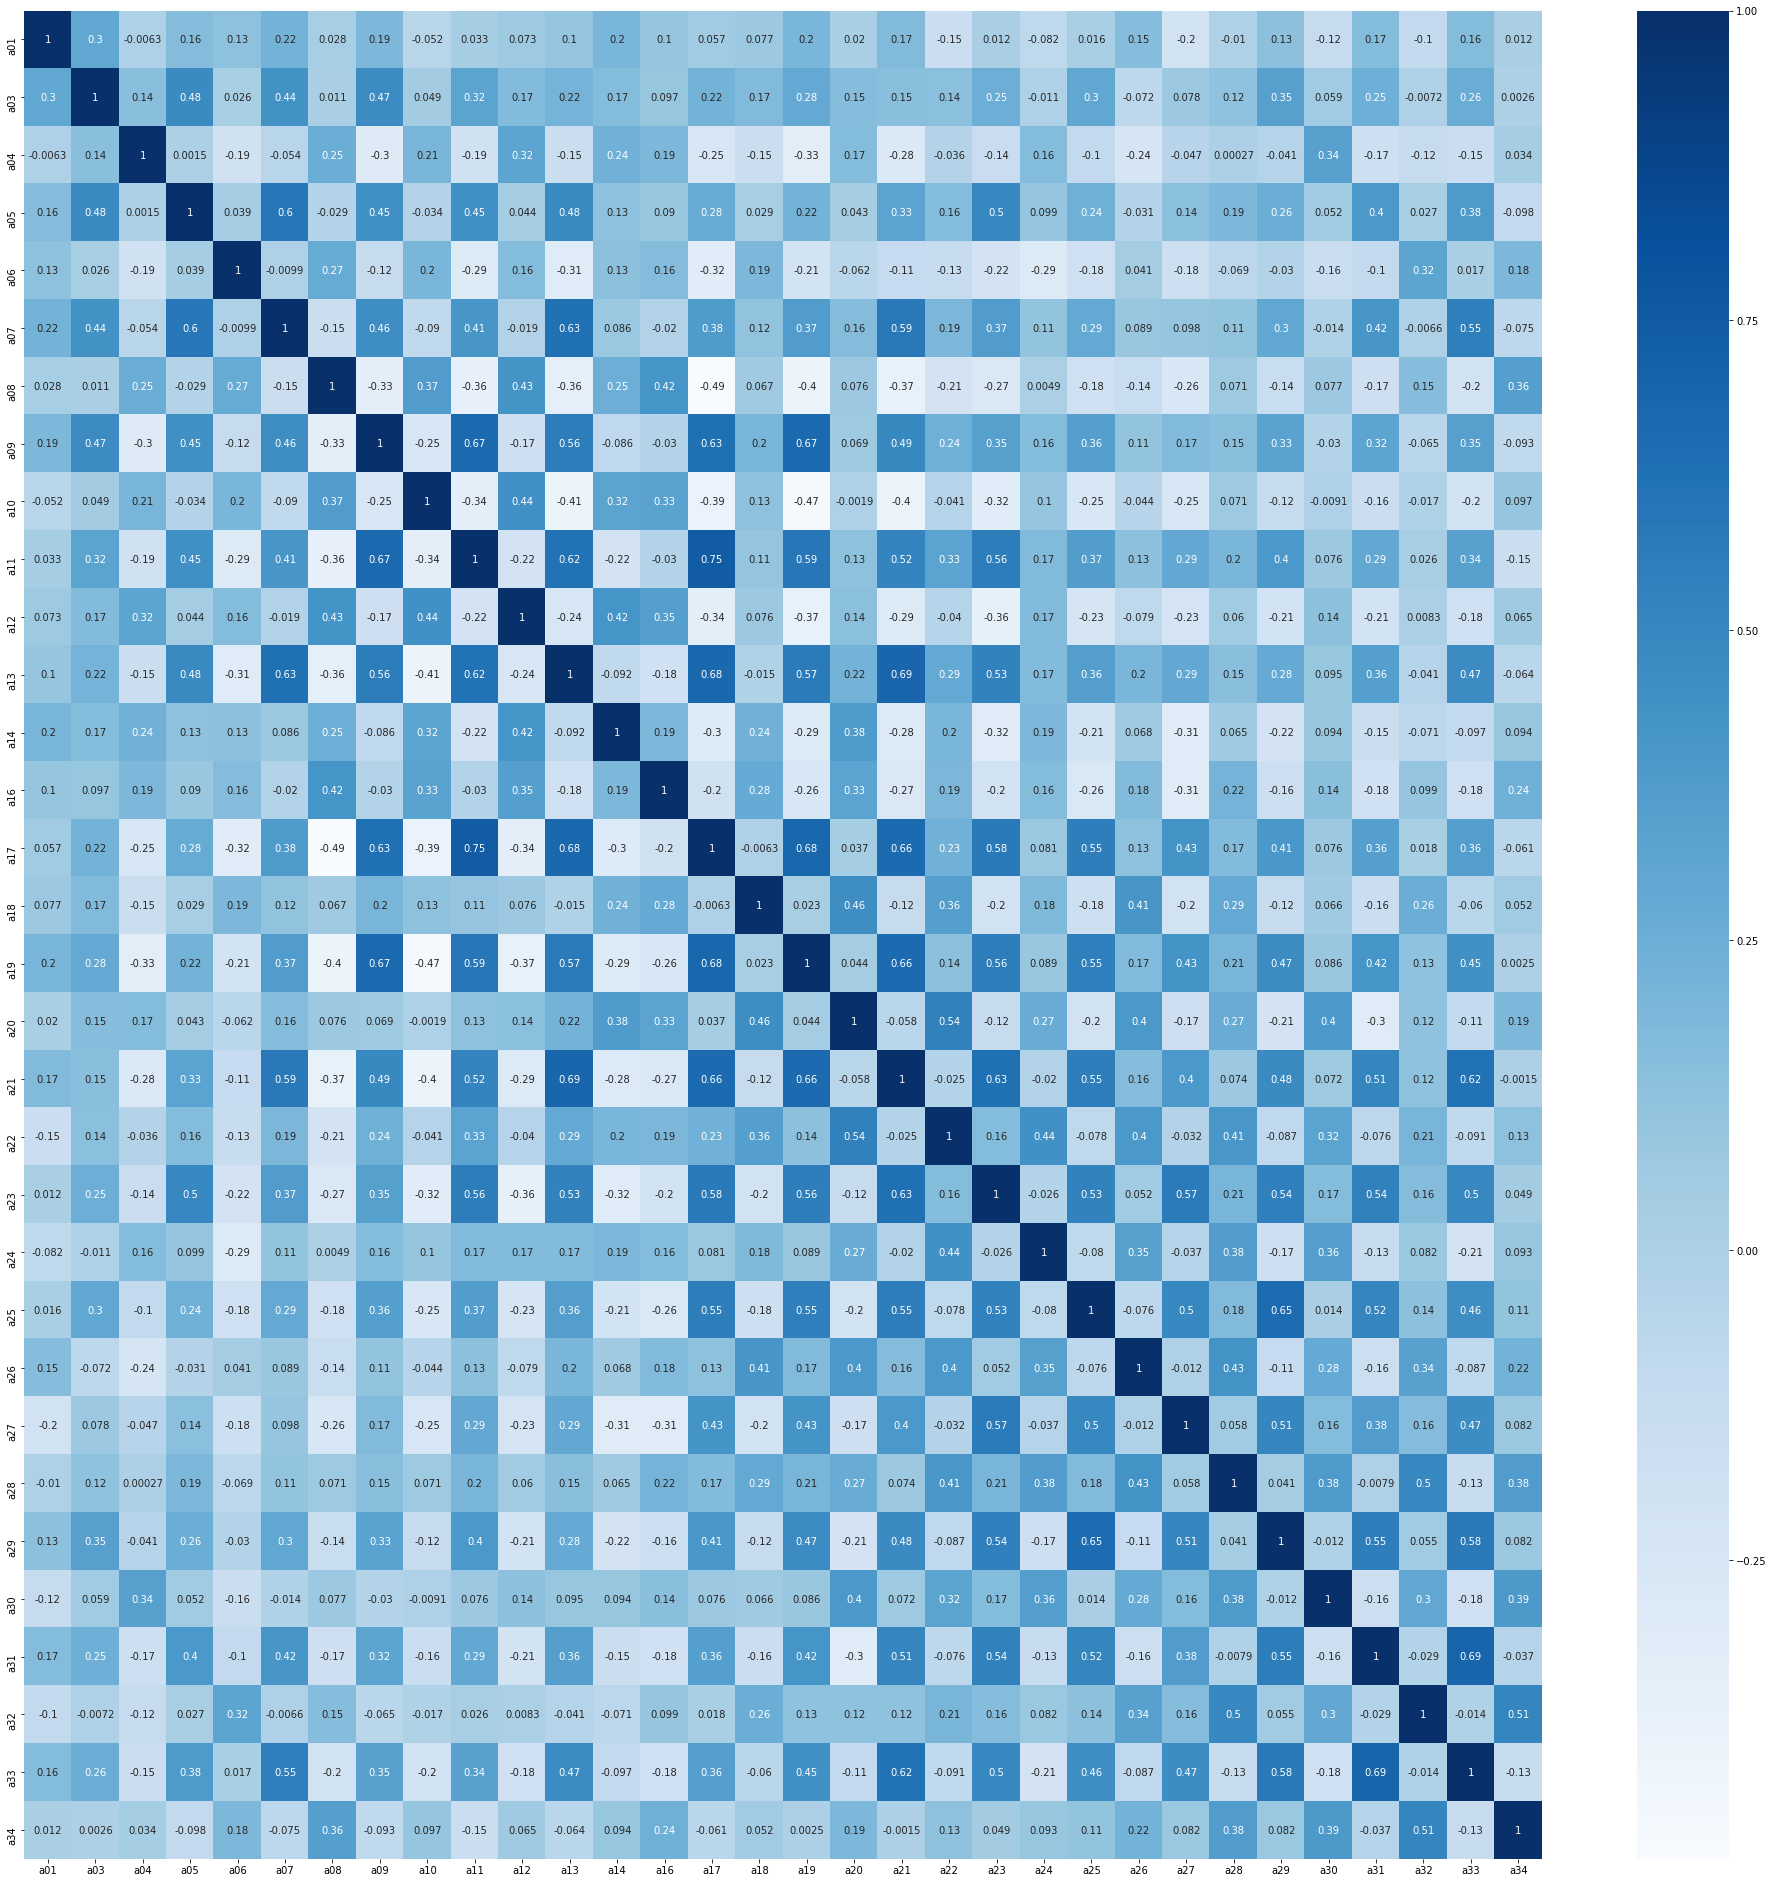

In [19]:
X = ionosphere.iloc[:,0:33] #Design Matrix
Y = ionosphere.iloc[:,-1] #response vector
#none left have a strong correlation
plt.figure(figsize = (34,34))
sns.heatmap(ionosphere.corr(), cmap='Blues', annot = True)

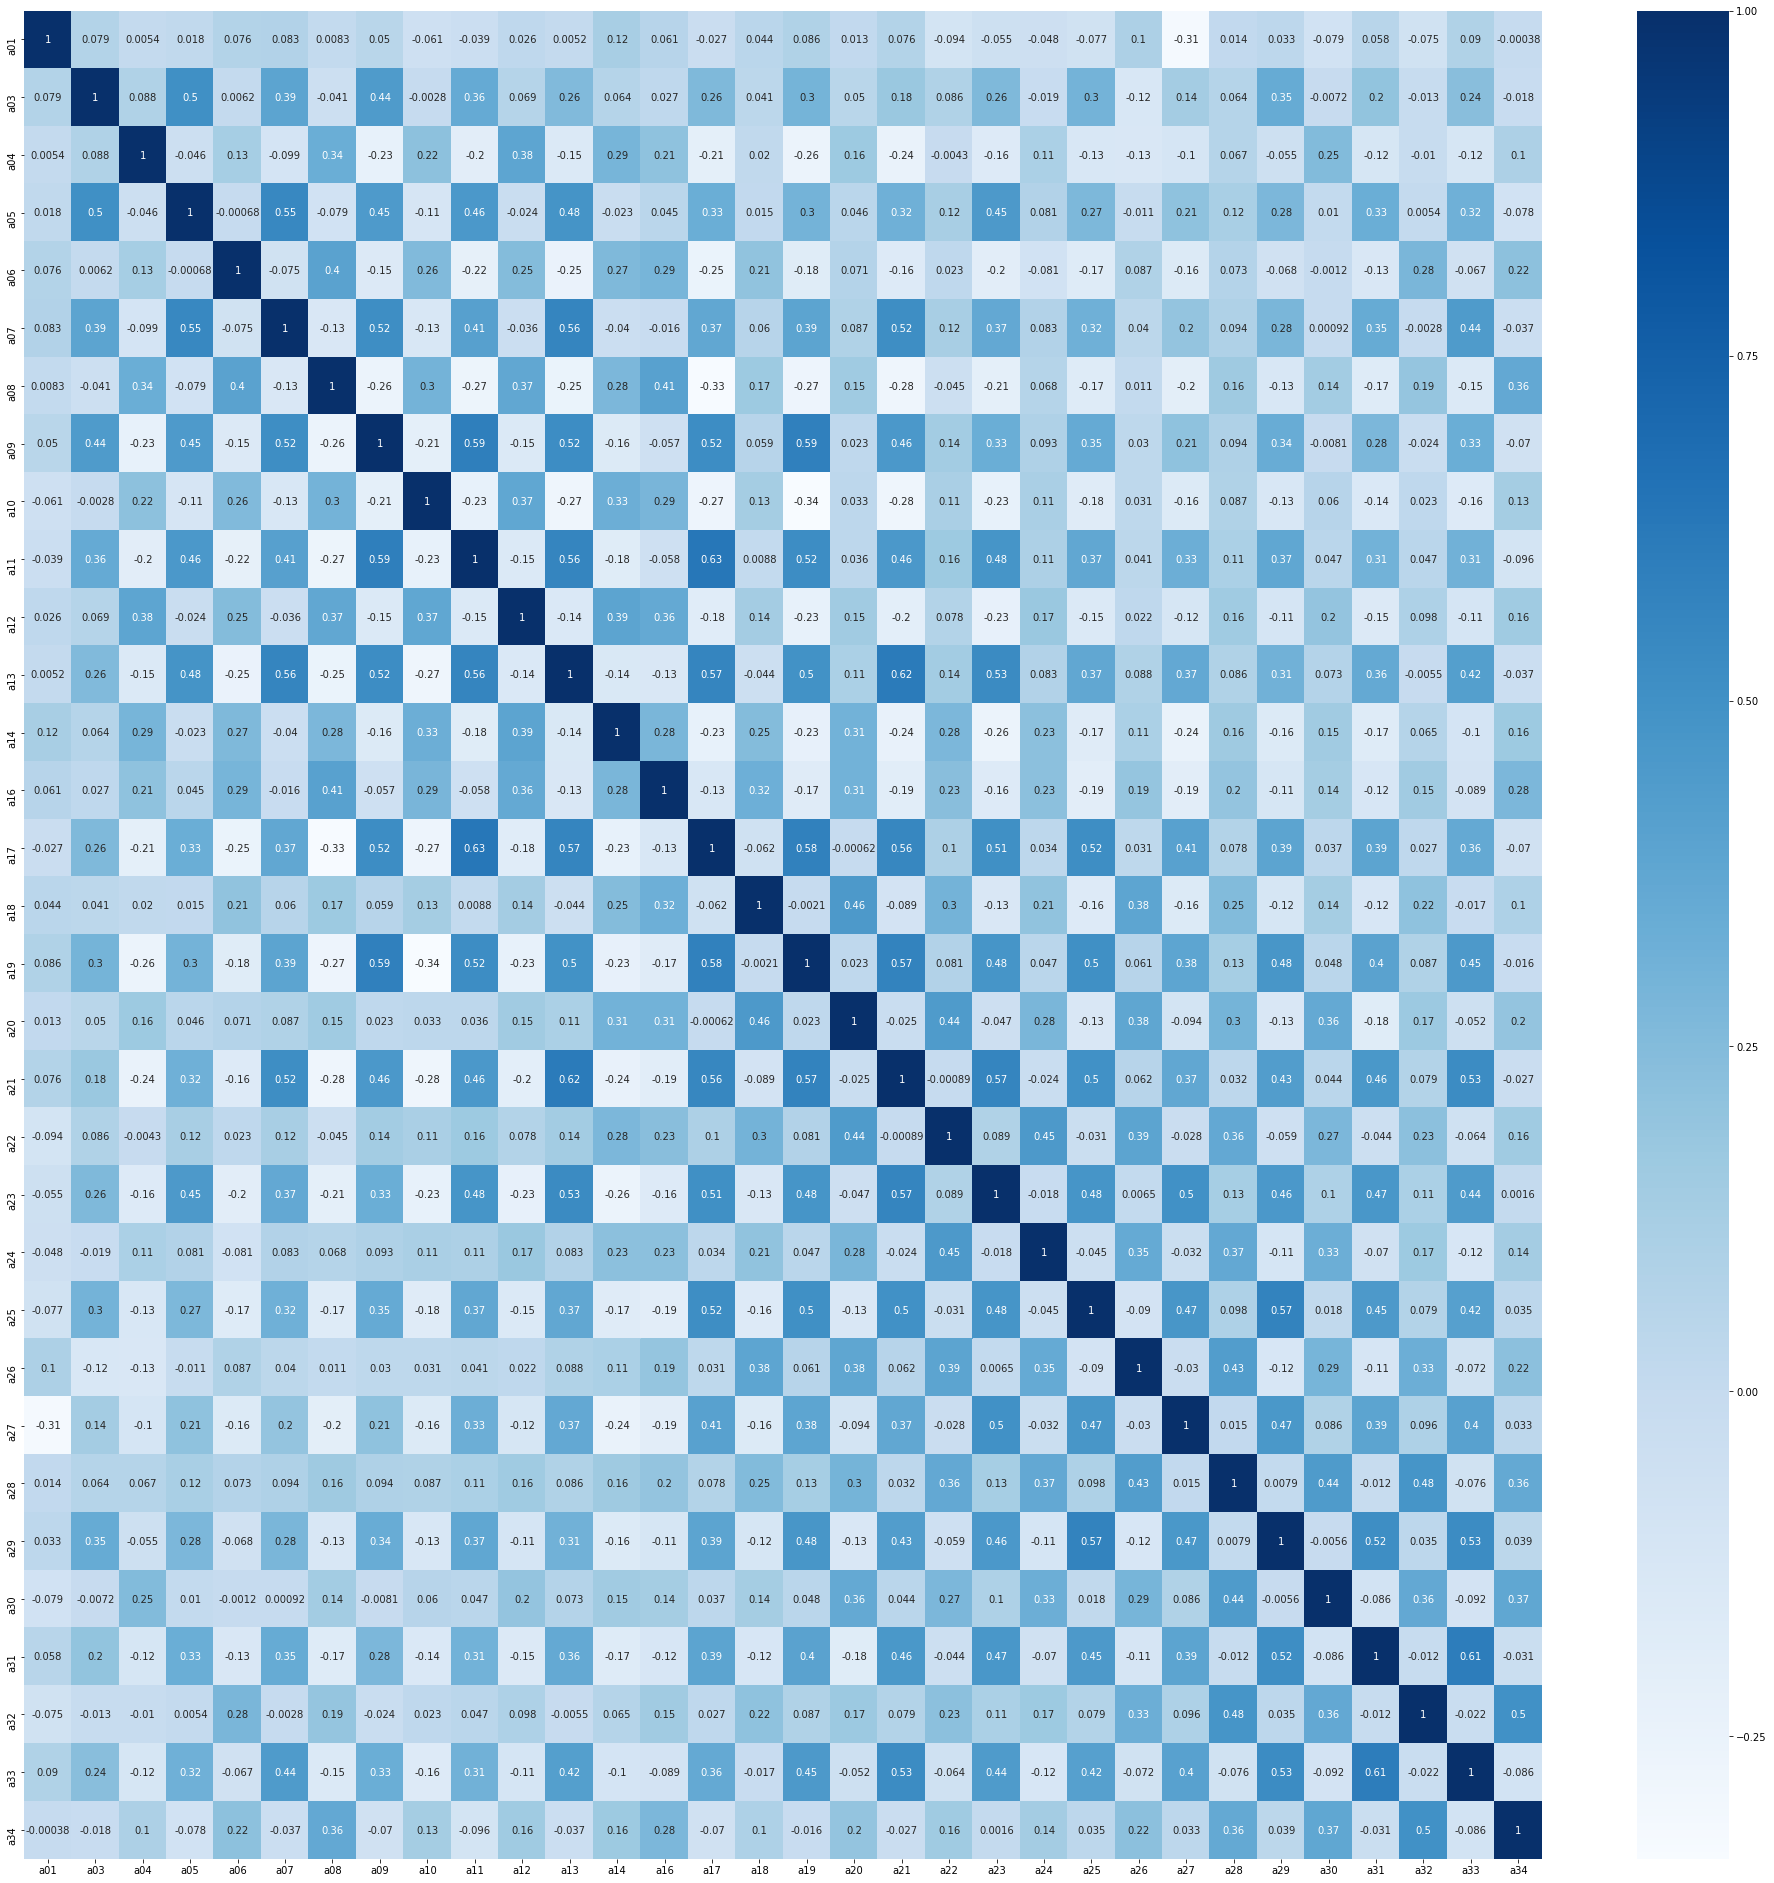

In [20]:
plt.figure(figsize = (34,34))
sns.heatmap(ionosphere.corr(method='kendall'), cmap='Blues', annot = True)

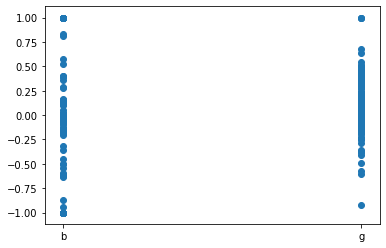

In [34]:
# cat_features = ionosphere.select_dtypes(include = ['float64'])
# sns.countplot(y = 'a01', hue = 'class', data = cat_features)
import matplotlib.pyplot as plt
plt.scatter(ionosphere['class'],ionosphere['a04'])


In [ ]:
b1.to_csv(r"/Users/chrisrafiaa/desktop/COMP551Andru/ionosphere.csv")